# 1.Install Packages

In [1]:
import tensorflow as tf
%matplotlib inline
import os
import cv2

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2.Remove dodgy images

In [4]:
image_path = os.path.join('data','fire_images','fire.1.png')
cv2.imread(image_path)

In [5]:
import imghdr

C:\Users\sabar\AppData\Local\Temp\ipykernel_20068\336752527.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = "fire_dataset"

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

Image not in ext list fire_dataset\fire_images\F_1158.jpg
Image not in ext list fire_dataset\fire_images\F_2247.jpg
Image not in ext list fire_dataset\fire_images\F_2388.jpg
Image not in ext list fire_dataset\non_fire_images\NF_1003.jpg
Image not in ext list fire_dataset\non_fire_images\NF_1005.jpg
Image not in ext list fire_dataset\non_fire_images\NF_1124.jpg
Image not in ext list fire_dataset\non_fire_images\NF_924.jpg


# 3.Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('fire_dataset')

Found 5540 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

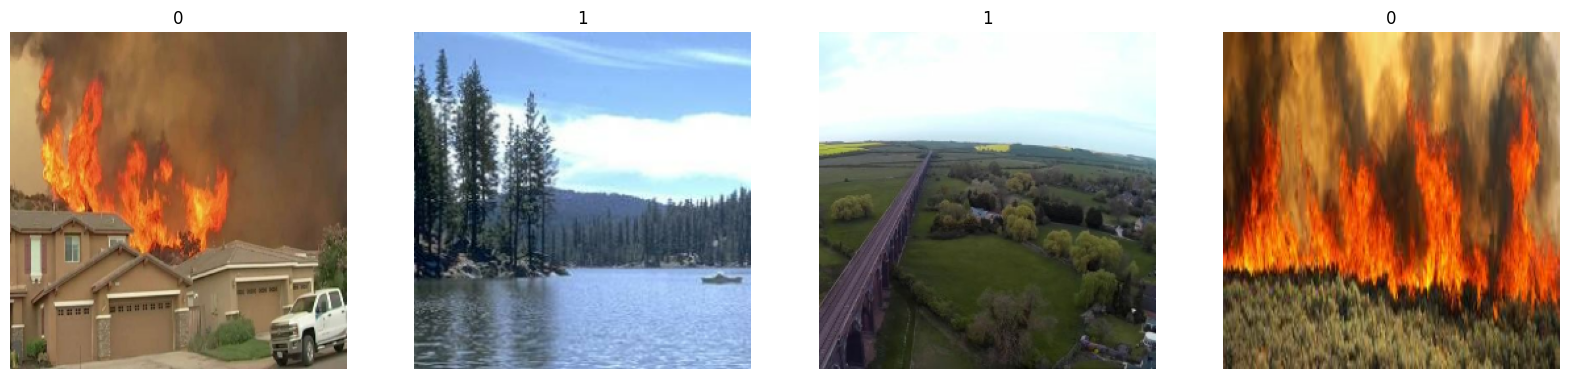

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].axis('off')
plt.show()

# 4.Scale/Normalising Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
print('Total number of batches: {}'.format(len(data)))

Total number of batches: 174


# 5.Split Data

In [16]:
train_size = int(len(data)*.7) + 1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
print('train set: {} batches'.format(train_size))
print('val set: {} batches'.format(val_size))
print('test set: {} batches'.format(test_size))

train set: 122 batches
val set: 34 batches
test set: 17 batches


In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6.Build Deep Learning Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\sabar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7.Train Data

In [25]:
logdir='train_logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 52s 397ms/step - accuracy: 0.7916 - loss: 0.5611 - val_accuracy: 0.9191 - val_loss: 0.2004
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 400ms/step - accuracy: 0.9262 - loss: 0.1850 - val_accuracy: 0.8897 - val_loss: 0.2696
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 398ms/step - accuracy: 0.9241 - loss: 0.1813 - val_accuracy: 0.9357 - val_loss: 0.1889
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 396ms/step - accuracy: 0.9477 - loss: 0.1307 - val_accuracy: 0.9283 - val_loss: 0.2207
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 404ms/step - accuracy: 0.9532 - loss: 0.1210 - val_accuracy: 0.9458 - val_loss: 0.1343
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 398ms/step - accuracy: 0.9622 - loss: 0.0951 - val_accuracy: 0.9559 - val_loss: 0.1157
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 400ms/step - accuracy: 0.9717 - loss: 0.0733 - val_accuracy: 0.9458 - val_loss: 0.1973
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 49s 397ms/step - accuracy: 0.9702 - loss: 0

# 8.Test Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


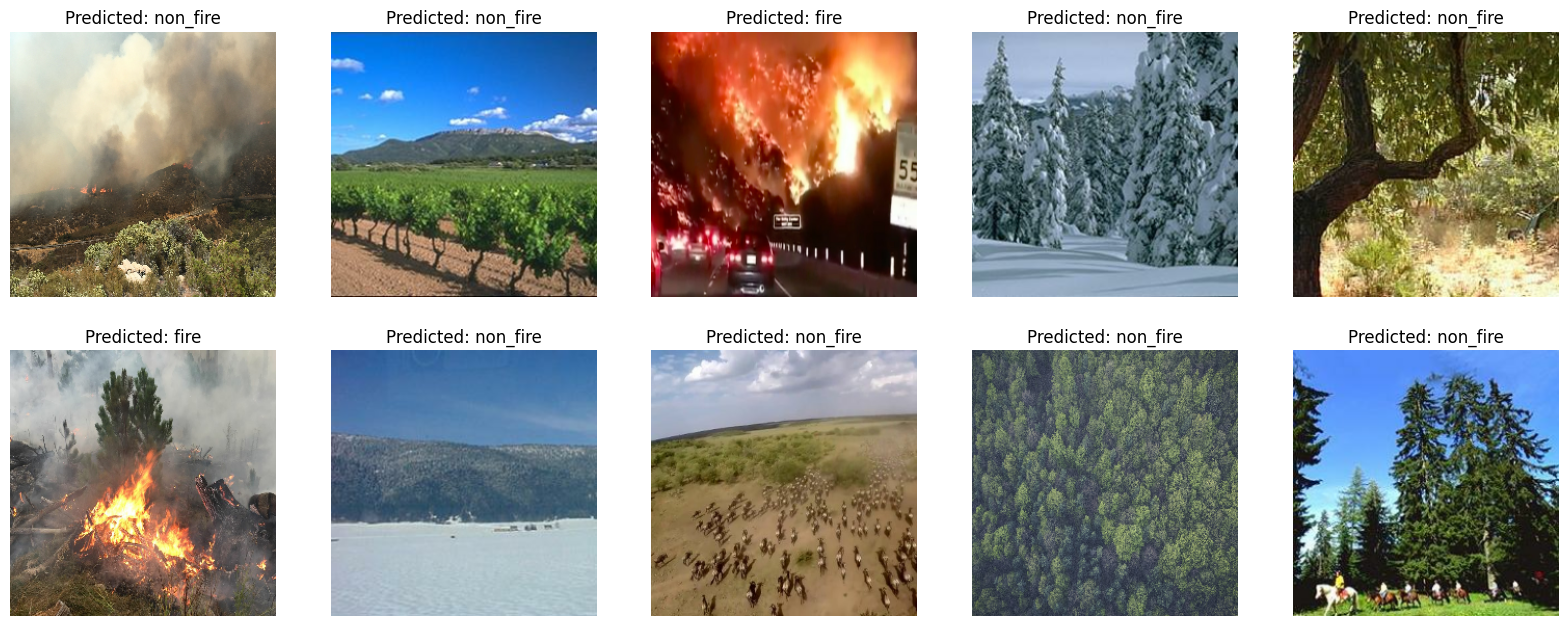

In [28]:
for images, labels in test.take(1):
    test_images = images[:10]
    test_labels = labels[:10]

predictions = model.predict(test_images)

def get_label_name(pred):
    return 'fire' if pred < 0.5 else 'non_fire'

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {get_label_name(predictions[i])}")
    plt.axis('off')
plt.show()

# 9.Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [32]:
print('precision: {}'.format(pre.result()))
print('recall: {}'.format(re.result()))
print('accuracy: {}'.format(acc.result()))

precision: 0.9305019378662109
recall: 0.9563491940498352
accuracy: 0.9466911554336548


# 10.Plot Performance

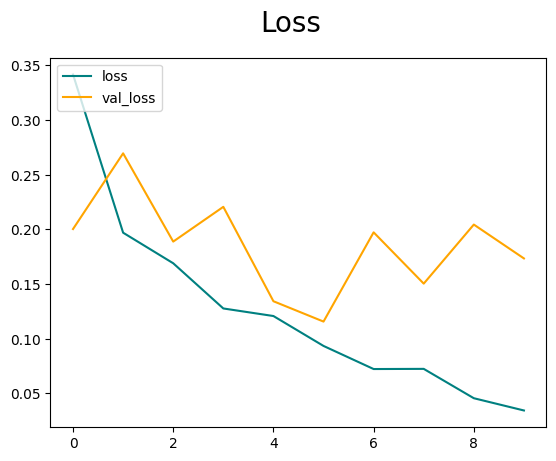

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

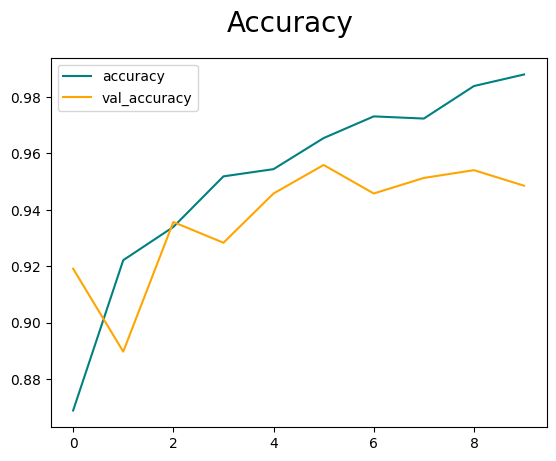

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 11.Custom Input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: fire


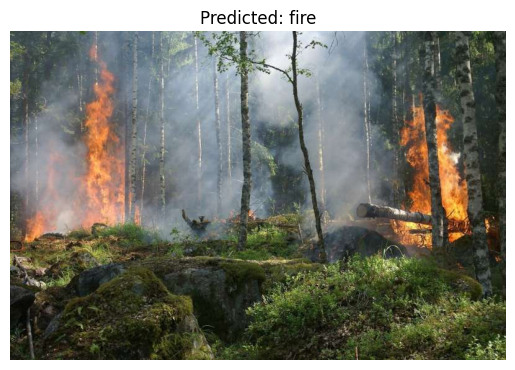

In [35]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0 
    img = np.expand_dims(img, axis=0)  
    return img

new_image_path = 'test_image.jpg'
new_image = load_and_preprocess_image(new_image_path)
prediction = model.predict(new_image)

print(f"Prediction: {get_label_name(prediction[0][0])}")

plt.imshow(cv2.imread(new_image_path)[:, :, ::-1]) 
plt.title(f"Predicted: {get_label_name(prediction[0][0])}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: non_fire


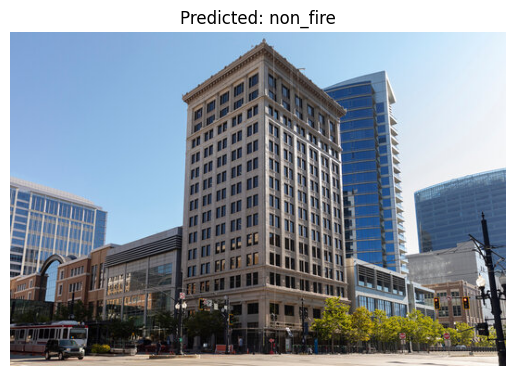

In [37]:
new_image_path = 'l.jpg' 
new_image = load_and_preprocess_image(new_image_path)
prediction = model.predict(new_image)


print(f"Prediction: {get_label_name(prediction[0][0])}")

plt.imshow(cv2.imread(new_image_path)[:, :, ::-1])
plt.title(f"Predicted: {get_label_name(prediction[0][0])}")
plt.axis('off')
plt.show()